In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt

from ipywidgets import widgets
from IPython.display import display

In [2]:
text = widgets.Text()
display(text)

def handle_submit(sender):
    print(text.value)

text.on_submit(handle_submit)

# Sine wave

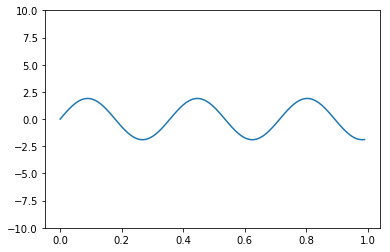

In [3]:
from ipywidgets.widgets import *
t = np.arange(0., 1., 0.01)
a_ = 1
f_ = 1

def pltsin(a,f):
    fig, ax = plt.subplots()
    ax.plot(t, a * np.sin(2*np.pi*f*t));
    ax.set_ylim([-10,10])
    plt.show()

def change_f(f):
    global a_, f_
    f_ = f
    pltsin(a_,f)

def change_a(a):
    global a_, f_
    a_ = a
    pltsin(a_,f_)

interact(change_f, f=(1,10,0.1))
interact(change_a, a=(1,10,0.1))

# Ricker wavelet

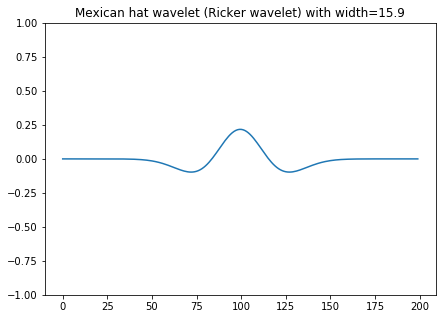

In [4]:
from scipy import signal
widths = np.arange(1, 91)

def pltricker(width):
    fig, axs = plt.subplots(1,1,figsize=(7,5))
    r1 = signal.ricker(200, width)
    axs.plot(r1)
    axs.set_ylim([-1,1])
    axs.set_title('Mexican hat wavelet (Ricker wavelet) with width=' + str(width))
    plt.show()

interact(pltricker, width=(1,50,0.1))

# Decaying oscillation

Consider a Newtonian equation

$$
F=m\ddot x
$$

where $F$ is a spring force which obeys Hooke's law and friction force.

$$
F = -ax - b\dot x
$$

where $b$ is viscous damping coefficient.

Then we get this:

$$
-ax - b\dot x = m \ddot x
$$

Let's assume $x$ is some function with exponential form, i.e. $x=A e^{\lambda x}$.
Substituting $x$ yields the following equation:

$$
(-a - b\lambda) A e^{\lambda x} = m\lambda^2 A e^{\lambda x}
$$

Then we can determine the factor $\lambda$.

$$
\lambda = \frac{-b \pm \sqrt{b^2 - 4ma}}{2m}
$$

If discrimination $D=b^2 - 4ma$ is less than 0, the system has vibration.

$$
\lambda = -{b \over 2m} - i{\sqrt{4ma - b^2} \over 2m}
$$

The real part $\Re{\lambda}=-b/2m$ indicates decaying envelope.
The imaginary part $\Im{\lambda}=\sqrt{4ma - b^2}/2m$ is the oscillation part.

Interestingly, the decay part doesn't depend on $b$.

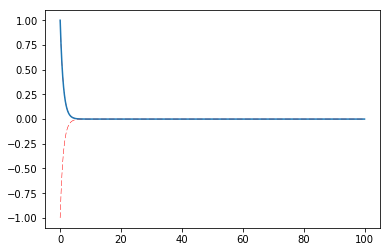

In [42]:
t = np.arange(0., 100., 0.01)

def pltdecos(m,a,b):
    fig, ax = plt.subplots()
    D = b * b - 4 * a / m
    if D < 0:
        decay = -b / (2 * m)
        osci = np.sqrt(-D) / (2 * m)
        ax.plot(t, np.transpose(np.array([-np.exp(decay*t), np.exp(decay*t)])), 'r--', linewidth=0.5);
        ax.plot(t, np.exp(decay*t) * np.cos(osci*t));
    else:
        lamb = (-b + np.sqrt(D)) / (2 * m)
        ax.plot(t, np.exp(lamb*t));
    ax.set_ylim([-1.1,1.1])
    plt.show()

interact(pltdecos, m=(1,100,0.1), a=(1,100,0.1), b=(0.1,50,0.1));